# Store sales anomlies

In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/ecomerce.csv', encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.loc[:,'sales'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [4]:
df.StockCode.value_counts()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: StockCode, Length: 4070, dtype: int64

In [13]:
df_stock = df.query('StockCode=="85123A"').copy()
df_stock

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:02,2.55,17850.0,United Kingdom,15.30
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:32,2.55,17850.0,United Kingdom,15.30
220,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,12/1/2010 10:19,2.55,17511.0,United Kingdom,163.20
262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,12/1/2010 10:39,2.55,13408.0,United Kingdom,81.60
...,...,...,...,...,...,...,...,...,...
539342,581439,85123A,CREAM HANGING HEART T-LIGHT HOLDER,1,12/8/2011 16:30,5.79,NaN,United Kingdom,5.79
539979,581452,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,12/8/2011 18:03,2.55,17675.0,United Kingdom,81.60
540217,581472,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/8/2011 19:55,2.95,15796.0,United Kingdom,17.70
540837,581492,85123A,CREAM HANGING HEART T-LIGHT HOLDER,3,12/9/2011 10:03,5.79,NaN,United Kingdom,17.37


In [15]:
df_stock['InvoiceDate'] = pd.to_datetime(df_stock['InvoiceDate'])
df_stock.set_index('InvoiceDate', inplace=True)

In [16]:
df_stock

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,sales
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
2010-12-01 09:02:00,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
2010-12-01 09:32:00,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
2010-12-01 10:19:00,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2.55,17511.0,United Kingdom,163.20
2010-12-01 10:39:00,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2.55,13408.0,United Kingdom,81.60
...,...,...,...,...,...,...,...,...
2011-12-08 16:30:00,581439,85123A,CREAM HANGING HEART T-LIGHT HOLDER,1,5.79,NaN,United Kingdom,5.79
2011-12-08 18:03:00,581452,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2.55,17675.0,United Kingdom,81.60
2011-12-08 19:55:00,581472,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.95,15796.0,United Kingdom,17.70


In [26]:
df_store = df_stock.resample('W').sum()[['sales']].copy()
df_store

,sales
InvoiceDate,
2010-12-05,2636.38
2010-12-12,3013.01
2010-12-19,2939.45
2010-12-26,490.12
2011-01-02,0.00
2011-01-09,2575.81
2011-01-16,9263.86
2011-01-23,1766.55
2011-01-30,1497.35


<AxesSubplot:xlabel='InvoiceDate'>

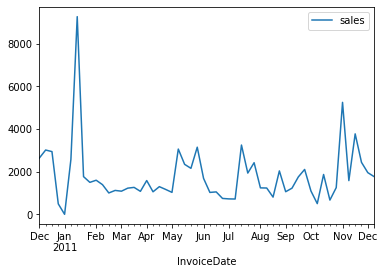

In [27]:
df_store.plot()

In [29]:
anomaly_detector = IsolationForest(contamination=.1)
anomaly_detector

IsolationForest(contamination=0.1)

In [30]:
anomaly_detector.fit(df_store.values)

IsolationForest(contamination=0.1)

In [32]:
df_store.loc[:,'anomalies'] = anomaly_detector.predict(df_store.values)
df_store

,sales,anomalies
InvoiceDate,,
2010-12-05,2636.38,1
2010-12-12,3013.01,1
2010-12-19,2939.45,1
2010-12-26,490.12,-1
2011-01-02,0.00,-1
2011-01-09,2575.81,1
2011-01-16,9263.86,-1
2011-01-23,1766.55,1
2011-01-30,1497.35,1


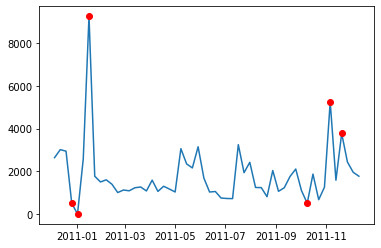

In [36]:
plt.plot(df_store.sales)
df_anomaly = df_store.query('anomalies==-1')
plt.plot(df_anomaly.sales, 'or')
plt.savefig(f'sales.png')